In [1]:
# Importing the Essential Libraries, Metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

import missingno as msno # to get visualization on missing values



# Read and Understand data

In [2]:
df = pd.read_csv('used_cars_data.csv')

In [3]:
cars=df.copy()
print(f'There are {cars.shape[0]} rows and {cars.shape[1]} columns')  #fstring

There are 7253 rows and 14 columns


In [4]:
#get the size of dataframe
print ("Rows     : " , cars.shape[0])  #get number of rows/observations
print ("Columns  : " , cars.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", cars.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", cars.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(cars.isna().sum() / cars.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", cars.nunique())  #  count of unique values

Rows     :  7253
Columns  :  14
######################################## 
 Features : 

 ['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']
######################################## 
Missing values :

 New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64
######################################## 
Percent of missing :

 S.No.                 0.00
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
En

In [5]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


# Visualize missing values

<AxesSubplot:>

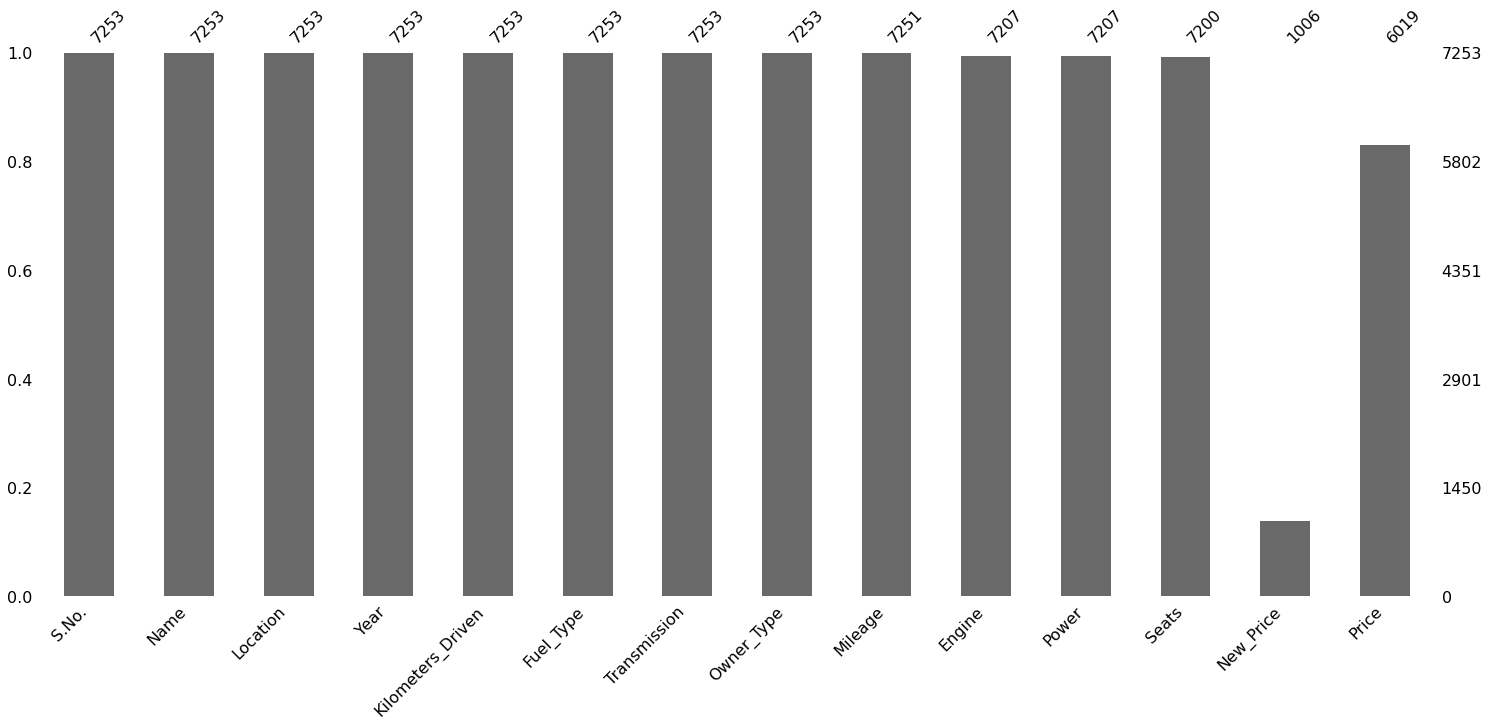

In [7]:
msno.bar(cars)

<AxesSubplot:>

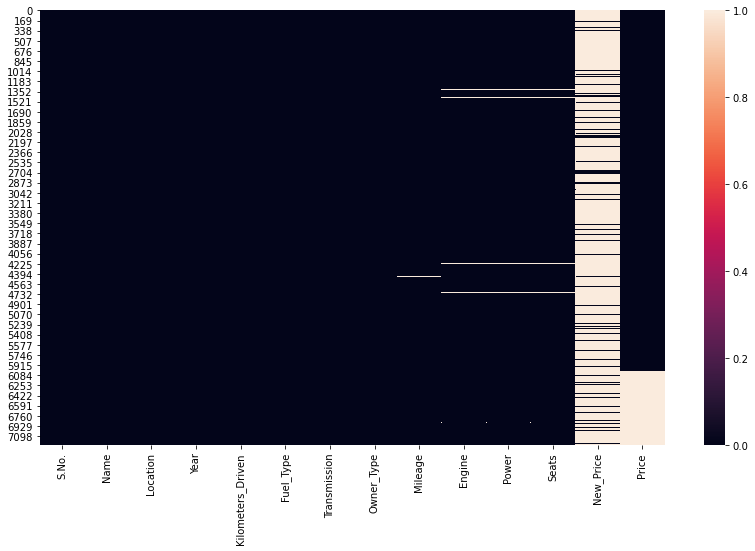

In [8]:
figure = plt.figure(figsize=(14,8))
sns.heatmap(cars.isna())

In [9]:
# Observations
# This preview shows that some columns potentially have a lot of missingness so we'll want to make sure to look into that later.

#     --> New_Price has only 1006 values. 86 % values are missing

#     --> Price, which is a Target variable 17 % missing values.This needs to be analysed further.

#     --> Seats has only 53 values missing and number of seats can be one of key factor in deciding price.

#     --> Power and Engine has 46 missing values.

#     --> Mileage only has two values missing.

#     --> Mileage,Power,Engine,New_Price we know are quantitative variables but are of object dtype here and needs to to converted to numeric.


In [10]:
# Making a list of all categorical variables
cat_col = [
    "Fuel_Type",
    "Location",
    "Transmission",
    "Seats",
    "Year",
    "Owner_Type",
    
]
# Printing number of count of each unique value in each column
for column in cat_col:
    print(cars[column].value_counts())
    print("#" * 40)

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
########################################
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
########################################
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
########################################
5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64
########################################
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: 

In [11]:
# -->Maximum car being sold have fuel type as Diesel.
# -->Mumbai has highest numbers of car availabe for purchase.
# -->5204 cars with Manual transmission are available for purchase.
# -->Most of the cars are 5 seaters and First owned.
# -->Years of car ranges form 1996- 2015

# Data Preprocessing

* Processing Engine,Power ,Mileage columns

In [12]:
cars[['Engine','Power','Mileage']].sample(10)

,Engine,Power,Mileage
1082,1422 CC,70 bhp,19.4 kmpl
64,1396 CC,69 bhp,25.0 kmpl
68,1248 CC,88.5 bhp,24.52 kmpl
5705,1399 CC,92.7 bhp,14.49 kmpl
7207,1248 CC,74 bhp,26.59 kmpl
3325,1798 CC,157.8 bhp,13.14 kmpl
617,1199 CC,73.9 bhp,22.07 kmpl
5269,2199 CC,194.3 bhp,14.66 kmpl
4312,1586 CC,104.68 bhp,15.6 kmpl
6235,2477 CC,175.56 bhp,13.5 kmpl


In [13]:
cars['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

# Mileage

In [14]:
cars[cars.Mileage.isnull()==True]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [15]:
cars.insert(1,'Mileage_N',cars['Mileage'].str.split().str.get(0))

In [16]:
cars['Mileage_N'].replace('null',np.nan,inplace=True)
cars['Mileage_N'].replace('nan',np.nan,inplace=True)
cars['Mileage_N'].replace('Nan',np.nan,inplace=True)

# Engine

In [17]:
cars.insert(1,'Engine_N',cars['Engine'].str.split().str.get(0))

In [18]:
#remove units
cars['Engine_N'].replace('null',np.nan,inplace=True)
cars['Engine_N'].replace('nan',np.nan,inplace=True)
cars['Engine_N'].replace('Nan',np.nan,inplace=True)

# Power

In [19]:
cars.insert(1,'Power_N',cars['Power'].str.split().str.get(0))

In [20]:
cars['Power_N'].replace('null',np.nan,inplace=True)
cars['Power_N'].replace('nan',np.nan,inplace=True)
cars['Power_N'].replace('Nan',np.nan,inplace=True)
# cars["Power"]= cars["Power"].replace(regex="null", value = np.nan)

In [21]:
#verify the data
num=['Engine_N','Power_N','Mileage_N']
cars[num].sample(20)

,Engine_N,Power_N,Mileage_N
7053,1461,83.8,20.45
5952,1298,88.2,16.1
2824,1598,103.5,15.26
5847,1968,141,19.5
4596,1498,98.6,25.1
734,1248,74,25.2
4874,1120,71,24.4
475,1968,108.49,17.72
5222,1497,117.3,17.4
7059,1396,69,23.03


In [22]:
cars.drop(columns=['New_Price','S.No.','Mileage','Power','Engine'],axis=1,inplace=True)

In [23]:
cars.query("Mileage_N == '0.0'")['Mileage_N'].count()

81

In [24]:
cars.query("Power_N == '0.0'")['Power_N'].count()

0

In [25]:
col=['Engine_N','Power_N','Mileage_N']
cars[col].isnull().sum()

Engine_N      46
Power_N      175
Mileage_N      2
dtype: int64

* fill the missing value with median

In [26]:
# cols1 = ["Power_N","Mileage_N","Engine_N",'Seats']

# for i in cols1:
#     cars[i] = cars[i].fillna(cars[i].median())

In [27]:
cars.dropna(inplace=True)

In [28]:
# cars['Price'] = cars['Price'].fillna(value=cars['Price'].median())

In [29]:
cars.isnull().sum()/len(cars)*100

Power_N              0.0
Engine_N             0.0
Mileage_N            0.0
Name                 0.0
Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Seats                0.0
Price                0.0
dtype: float64

In [30]:
cars.head(5)

,Power_N,Engine_N,Mileage_N,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price
0,58.16,998,26.6,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75
1,126.2,1582,19.67,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50
2,88.7,1199,18.2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50
3,88.76,1248,20.77,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00
4,140.8,1968,15.2,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74


In [31]:
cars.describe()

,Year,Kilometers_Driven,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,5.283719,9.603919
std,3.164568,9.216941e+04,0.805081,11.249453
min,1998.000000,1.710000e+02,2.000000,0.440000
25%,2012.000000,3.342250e+04,5.000000,3.517500
50%,2014.000000,5.260900e+04,5.000000,5.750000
75%,2016.000000,7.240275e+04,5.000000,10.000000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [32]:
cars['Year'].value_counts()

2014    794
2015    740
2016    737
2013    639
2017    586
2012    562
2011    452
2010    333
2018    298
2009    191
2008    162
2007    105
2019    102
2006     66
2005     42
2004     25
2003     14
2002     11
2001      4
2000      4
1998      3
1999      2
Name: Year, dtype: int64

In [33]:
cars.count()[['Mileage_N','Engine_N','Power_N']]

Mileage_N    5872
Engine_N     5872
Power_N      5872
dtype: int64

In [34]:
cars['Name'].head(10)

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
5        Hyundai EON LPG Era Plus Option
6                 Nissan Micra Diesel XV
7      Toyota Innova Crysta 2.8 GX AT 8S
8    Volkswagen Vento Diesel Comfortline
9         Tata Indica Vista Quadrajet LS
Name: Name, dtype: object

In [35]:
sum(cars['Name'].str.startswith('Land Rover'))

57

In [36]:
# cars['Name'].apply(lambda x:x.split('')[-1]).value_counts()

In [37]:
cars['Name'].str.replace('Land Rover','Land-Rover').str.split().str.get(0)

0          Maruti
1         Hyundai
2           Honda
3          Maruti
4            Audi
          ...    
6014       Maruti
6015      Hyundai
6016     Mahindra
6017       Maruti
6018    Chevrolet
Name: Name, Length: 5872, dtype: object

In [38]:
cars.insert(1,'Brand',cars['Name'].str.replace('Land Rover','Land-Rover').str.split().str.get(0))

In [39]:
cars['Brand'].head(30)

0            Maruti
1           Hyundai
2             Honda
3            Maruti
4              Audi
5           Hyundai
6            Nissan
7            Toyota
8        Volkswagen
9              Tata
10           Maruti
11            Honda
12           Maruti
13       Land-Rover
14       Land-Rover
15       Mitsubishi
16            Honda
17           Maruti
18          Renault
19    Mercedes-Benz
20              BMW
21           Maruti
22             Audi
23          Hyundai
24       Volkswagen
25            Honda
26           Nissan
27           Maruti
28            Honda
29           Toyota
Name: Brand, dtype: object

In [40]:
cars.head()

,Power_N,Brand,Engine_N,Mileage_N,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price
0,58.16,Maruti,998,26.6,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75
1,126.2,Hyundai,1582,19.67,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50
2,88.7,Honda,1199,18.2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50
3,88.76,Maruti,1248,20.77,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00
4,140.8,Audi,1968,15.2,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74


In [41]:
cars.nunique()

Power_N               370
Brand                  30
Engine_N              139
Mileage_N             429
Name                 1811
Location               11
Year                   22
Kilometers_Driven    3038
Fuel_Type               4
Transmission            2
Owner_Type              4
Seats                   8
Price                1364
dtype: int64

In [42]:
cars.dtypes

Power_N               object
Brand                 object
Engine_N              object
Mileage_N             object
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Seats                float64
Price                float64
dtype: object

# Feature Enginering

# converting datatype

In [43]:
#converting object data type to category data type
cars["Fuel_Type"] = cars["Fuel_Type"].astype("category")
cars["Transmission"] = cars["Transmission"].astype("category")
cars["Owner_Type"] = cars["Owner_Type"].astype("category")
#converting datatype  
cars["Mileage_N"] = cars["Mileage_N"].astype(float)
cars["Power_N"] = cars["Power_N"].astype(float)
cars["Engine_N"]=cars["Engine_N"].astype(float)

In [44]:
cars.dtypes

Power_N               float64
Brand                  object
Engine_N              float64
Mileage_N             float64
Name                   object
Location               object
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Seats                 float64
Price                 float64
dtype: object

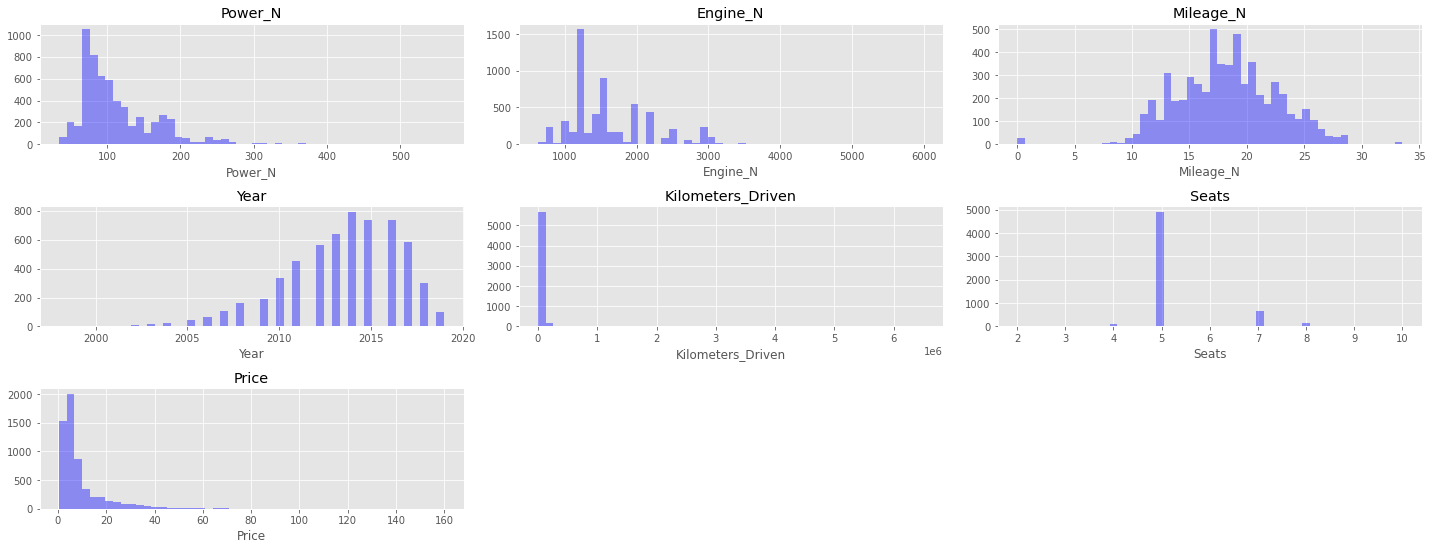

In [45]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(cars[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

In [46]:
# cat_columns=['Location','Fuel_Type','Transmission', 'Owner_Type'] #cars.select_dtypes(exclude=np.number).columns.tolist()

# plt.figure(figsize=(15,21))

# for i, variable in enumerate(cat_columns):
#                      plt.subplot(4,2,i+1)
#                      order = cars[variable].value_counts(ascending=False).index    
#                      ax=sns.countplot(x=cars[variable], data=cars , order=order ,palette='viridis')
#                      for p in ax.patches:
#                            percentage = '{:.1f}%'.format(100 * p.get_height()/len(cars[variable]))
#                            x = p.get_x() + p.get_width() / 2 - 0.05
#                            y = p.get_y() + p.get_height()
#                            plt.annotate(percentage, (x, y),ha='center')
#                      plt.xticks(rotation=90)
#                      plt.tight_layout()
#                      plt.title(variable)

* Car Profile

In [47]:
numeric_columns= numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=cars[variable],y=cars['Price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

# Bivariate & Multivariate Analysis

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(cars.corr(),annot=True)
plt.show()

In [49]:
# Observations

# -->Engine has strong positive correlation to Power [0.86].
# -->Price has positive correlation to Engine[0.66] as well Power [0.77].
# -->Mileage is negative correlated to Engine,Power,Price.
# -->Kilometer driven doesnt impact Price

In [50]:
sns.pairplot(data=cars , corner=True)
plt.show()

In [51]:
# Observations

# --->>Same observation about correlation as seen in heatmap.

# -->Kilometer driven doesnot have impact on Price .
# -->As power increase mileage decrease.
# -->Car with recent make sell at higher prices.
# -->Engine and Power increase , price of the car seems to increase.

# Variables that are correlated with Price variable

* Price Vs Engine Vs Transmission

In [52]:
# understand relation ship of Engine vs Price and Transmimssion

plt.figure(figsize=(10,7))
plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='Engine', x='Price', hue='Transmission', data=cars)

* Price Vs Power vs Transmission

In [53]:
 #understand relationship betweem Price and Power
    
plt.figure(figsize=(10,7))
plt.title("Price vs Power based on Transmission")
sns.scatterplot(y='Power', x='Price', hue='Transmission', data=cars)

* Price Vs Mileage Vs Transmission

In [54]:
# Understand the relationships  between mileage and Price

sns.scatterplot(y='Mileage', x='Price', hue='Transmission', data=cars)

* Price Vs Year Vs Transmission

In [55]:
# Impact of years on price 

plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price',hue='Transmission',
             data=cars)

* Price Vs Year VS Fuel Type

In [56]:
# Impact of years on price

plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Year', y='Price',hue='Fuel_Type',
             data=cars)

* Year Vs Price Vs Owner_Type

In [57]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS Owner_Type")
sns.lineplot(x='Year', y='Price',hue='Owner_Type',
             data=cars)

* Price Vs Mileage vs Fuel_type

In [58]:
# Understand relationships  between price and mileage

plt.figure(figsize=(10,7))
plt.title("Price Vs Mileage")
sns.scatterplot(y='Price', x='Mileage', hue='Fuel_Type', data=cars)

* Price Vs Seat

In [59]:
#Price and seats 

plt.figure(figsize=(15,10))
sns.set(font_scale=2)
sns.barplot(x='Seats', y='Price', data=cars)
plt.grid()

* Price Vs Location

In [60]:
#Price and LOcation 

plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Location', y='Price', data=cars)
plt.grid()

* Price Vs Name

In [61]:
#Price and band 

plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.boxplot(x='Price', y='Name', data=cars)
plt.grid()

In [62]:
sns.relplot(data=cars, y='Price',x='Mileage',hue='Transmission',aspect=2,height=5)

In [63]:
sns.relplot(data=cars, y='Price',x='Year',col='Owner_Type',hue='Transmission',aspect=1,height=5)

In [64]:
sns.relplot(data=cars, y='Price',x='Engine',col='Transmission',aspect=1,height=6,hue="Fuel_Type")

In [65]:
sns.relplot(data=cars, y='Price',x='Year',col='Transmission',aspect=1,height=6)

** Insights based on EDA

In [66]:
# Observations

# -->Expensive cars are in Coimbatore and Banglore.
# -->2 Seater cars are more expensive.
# -->Deisel Fuel type car are more expensive compared to other fuel type.
# -->As expected, Older model are sold cheaper compared to latest model
# -->Automatic transmission vehicle have a higher price than manual transmission vehicles.
# -->Vehicles with more engine capacity have higher prices.
# -->Price decreases as number of owner increases.
# -->Automatic transmission require high engine and power.
# -->Prices for Cars with fuel type as Deisel has increased with recent models
# -->Engine,Power, how old the car his, Mileage,Fuel type,location,Transmission effect the price.

In [67]:
# check distrubution if skewed. If distrubution is skewed , it is advice to use log transform

cols_to_log = cars.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(cars[colname], kde=True)
    plt.show()

In [68]:
# sns.displot(data=df ,x='Price',hue='Transmission',aspect=3,palette=('blue','orange'))

In [69]:
# sns.countplot(data=df,x='Price',hue='Transmission')

In [70]:
# sns.displot(data=df,x='Price',hue='Owner_Type',aspect=3,palette=('red','blue','green','pink'))

In [71]:
# sns.displot(data=df ,x='Price', hue='Fuel_Type',aspect=3)

In [72]:
# sns.displot(data=df,x='Price',hue='Seats',aspect=3,)

In [73]:
# sns.pairplot(data=df,kind='scatter')

In [74]:
# sns.pairplot(df)

In [75]:
cars.nunique()

Power_N               368
Brand                  30
Engine_N              139
Mileage_N             429
Name                 1811
Location               11
Year                   22
Kilometers_Driven    3038
Fuel_Type               4
Transmission            2
Owner_Type              4
Seats                   8
Price                1364
dtype: int64

In [76]:
cars.columns

Index(['Power_N', 'Brand', 'Engine_N', 'Mileage_N', 'Name', 'Location', 'Year',
       'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'Price'],
      dtype='object')

In [77]:
# df['Mileage'] = pd.to_numeric(df['Mileage'])
# df['Engine'] = pd.to_numeric(df['Engine'])
# df['Power'] = pd.to_numeric(df['Power'])
# df['Mileage'] = pd.to_numeric(df['Mileage'])

# Model Building

# Feature Selection

In [78]:
cars = pd.get_dummies(cars,drop_first=True)
cars

,Power_N,Engine_N,Mileage_N,Year,Kilometers_Driven,Seats,Price,Brand_Audi,Brand_BMW,Brand_Bentley,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,58.16,998.0,26.60,2010,72000,5.0,1.75,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,126.20,1582.0,19.67,2015,41000,5.0,12.50,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,88.70,1199.0,18.20,2011,46000,5.0,4.50,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,88.76,1248.0,20.77,2012,87000,7.0,6.00,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,140.80,1968.0,15.20,2013,40670,5.0,17.74,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,74.00,1248.0,28.40,2014,27365,5.0,4.75,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6015,71.00,1120.0,24.40,2015,100000,5.0,4.00,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6016,112.00,2498.0,14.00,2012,55000,8.0,2.90,0,0,0,...,0,0,0,1,0,0,1,0,1,0
6017,67.10,998.0,18.90,2013,46000,5.0,2.65,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [79]:
cars.shape

(5872, 1863)

In [80]:
x = cars.drop('Price',axis=1)
y = cars['Price']

# Train Test Split

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
xtrain , xtest , ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=42)

In [83]:
print("xtrain:",xtrain.shape)
print("xtest:",xtest.shape)
print("ytrain:",ytrain.shape)
print("ytest:",ytest.shape)

xtrain: (4404, 1862)
xtest: (1468, 1862)
ytrain: (4404,)
ytest: (1468,)


# LinearRegression

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [85]:
model = LinearRegression()

In [86]:
model.fit(xtrain,ytrain)

LinearRegression()

In [87]:
score_LR = model.score(xtest,ytest)

In [88]:
score_LR*100

-12228490425864.043

In [89]:
score_LR_train = model.score(xtrain,ytrain)
score_LR_train*100

96.83187514334506

In [90]:
y_pred_LR = model.predict(xtest)

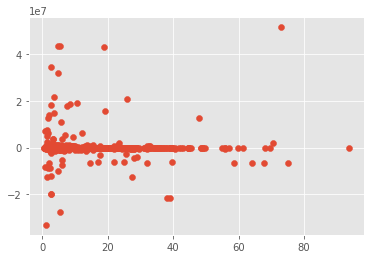

In [91]:
plt.scatter(ytest,y_pred_LR)

In [92]:
print('mae:',mean_absolute_error(ytest,y_pred_LR))

mae: 633011.7311152952


# DecisionTreeRegressor

In [93]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()

In [94]:
model_dt = DecisionTreeRegressor()

In [95]:
model_dt.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [96]:
score_dt = model_dt.score(xtest,ytest)
score_dt*100

75.08888752470514

In [97]:
score_dt_train = model_dt.score(xtrain,ytrain)
score_dt_train*100

99.99966072186021

In [98]:
y_pred_dt = model_dt.predict(xtest)

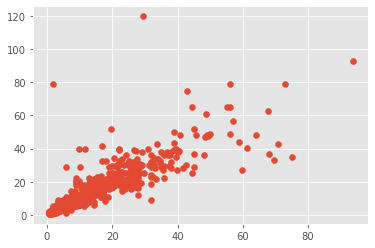

In [99]:
plt.scatter(ytest,y_pred_dt)

# RandomForestRegressor

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
model_rf = RandomForestRegressor()

In [102]:
model_rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [103]:
score_rf = model_rf.score(xtest,ytest)
score_rf*100

88.45058191653922

In [104]:
score_rf_train = model_rf.score(xtrain,ytrain)
score_rf_train*100

98.68666673543811

In [105]:
y_pred_rf = model_rf.predict(xtest)

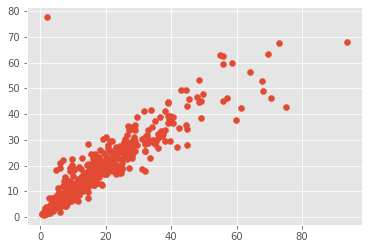

In [106]:
plt.scatter(ytest,y_pred_rf)

# XGBRegressor

In [107]:
from xgboost.sklearn import XGBRegressor

In [108]:
xg_regressor = XGBRegressor()

In [109]:
xg_regressor.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [110]:
xg_score = xg_regressor.score(xtest,ytest)
xg_score*100

89.30579739120783

In [111]:
y_pred_xg = xg_regressor.predict(xtest)

In [112]:
r2_score(ytest,y_pred_xg)*100

89.30579739120783

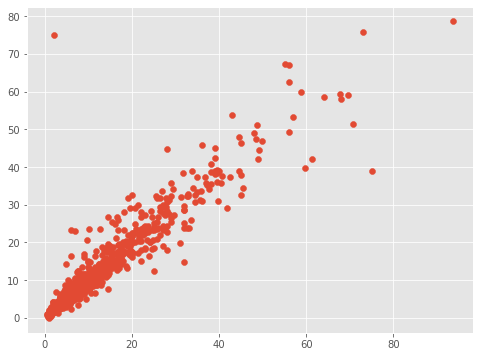

In [113]:
figure = plt.figure(figsize=(8,6))
plt.scatter(ytest,y_pred_xg)

# GradientBoostingRegressor

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
gb_model = GradientBoostingRegressor()

In [116]:
gb_model.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [117]:
gb_score = gb_model.score(xtest,ytest)
gb_score*100

87.68168932056861

In [118]:
gb_score_train = gb_model.score(xtrain,ytrain)
gb_score_train*100

94.6329544753922

In [119]:
y_pred_gb = gb_model.predict(xtest)

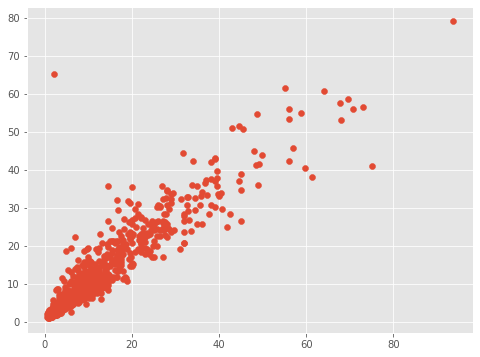

In [120]:
figure = plt.figure(figsize=(8,6))
plt.scatter(ytest,y_pred_gb)

In [121]:
# imp = pd.Series(model_rf.feature_importances_,index=x.columns).sort_values()
# plt.figure(figsize=(12,16))
# imp.plot.barh()
# plt.show()

In [122]:
# pd.to_pickle(model_rf,'Sell-Used-Car.pkl')